# Esplorazione dati

## Importazione di dati, moduli e pacchetti

In [4]:
#Stile di visualizzazione plot fatti con matplotlib
%matplotlib inline

#Base
import pandas as pd
import numpy as np
import scipy as sp

#Visualizzazione
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [5]:
# IMPORT DATA
TrainData = pd.read_csv('./diabetes_train.csv')
display(TrainData)

gender        age  hypertension  heart_disease smoking_history  \
0      Male  64.822537             0              0           never   
1      Male  59.912290             1              0           never   
2      Male  67.853267             0              0          former   
3      Male  57.985607             0              0           never   
4      Male  70.278133             0              0         current   
..      ...        ...           ...            ...             ...   
583  Female  19.354174             0              0          former   
584  Female  70.000000             0              0     not current   
585    Male  60.000000             0              1         current   
586  Female  27.000000             0              0         No Info   
587    Male  80.000000             0              0            ever   

           bmi  HbA1c_level  blood_glucose_level  Insulin_Sensitivity_Est  \
0    27.097915     6.517746           157.338059                 1.220942   
1    33.206670     7.971341           148.625701                 0.807652   
2    30.639790     8.919297           240.733664                 1.225950   
3    32.609541     8.759698           154.640163                 1.432736   
4    37.703827     6.261874           169.415511                 0.684205   
..         ...          ...                  ...                      ...   
583  28.670601     5.248329           160.905601                 0.959618   
584  24.750000     3.500000           159.000000                -1.084071   
585  29.050000     5.800000           145.000000                -0.468180   
586  27.320000     6.000000           200.000000                      NaN   
587  17.350000     3.500000           130.000000                -0.596994   

     BMI_Glucose_Interaction  Random_Lab_Marker  diabetes  
0                4262.942153          38.820127         1  
1                4932.729931          40.381336         1  
2                7372.749574          55.789060         1  
3                5039.552869          40.877685         1  
4                6267.482417          53.671280         1  
..                       ...                ...       ...  
583              4808.000000          52.632201         0  
584              3935.250000          43.652306         0  
585              4212.250000          58.503956         0  
586              5464.000000          60.704415         0  
587              2255.500000          35.951112         0  

[588 rows x 12 columns]

## Esplorazione dati

In [6]:
print('TRAINING SET')
TrainData.info()

TRAINING SET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.2+ KB


Valori mancanti solamente per l'attributo "Insulin_Sensitivity_Est

In [7]:
print('Categorical features: ')
print(TrainData.select_dtypes(exclude=['float','int']).columns)

Categorical features: 
Index(['gender', 'smoking_history'], dtype='object')


In [8]:
display(TrainData.drop(columns='diabetes').describe())

age  hypertension  heart_disease         bmi  HbA1c_level  \
count  588.000000    588.000000     588.000000  588.000000   588.000000   
mean    45.305054      0.078231       0.034014   28.361672     5.812900   
std     21.770802      0.268764       0.181418    7.098412     1.399697   
min     -0.618799      0.000000       0.000000   13.860000     1.826630   
25%     29.000000      0.000000       0.000000   25.169932     4.852182   
50%     50.000000      0.000000       0.000000   27.320000     6.000000   
75%     63.046163      0.000000       0.000000   30.940241     6.600000   
max     80.307029      1.000000       1.000000   95.690000     9.770172   

       blood_glucose_level  Insulin_Sensitivity_Est  BMI_Glucose_Interaction  \
count           588.000000               477.000000               588.000000   
mean            152.216394                 0.802415              4389.052443   
std              51.975885                 0.979681              2107.296008   
min              75.779495                -1.995469              1247.400000   
25%             126.000000                 0.163540              2849.322500   
50%             149.829332                 0.743667              4085.825000   
75%             160.000000                 1.394517              5066.750000   
max             300.000000                 4.126108             12513.000000   

       Random_Lab_Marker  
count         588.000000  
mean           49.747005  
std             9.283085  
min            19.760969  
25%            43.214722  
50%            49.710254  
75%            55.684763  
max            72.078046

### Diabete

In [9]:
values, count = np.unique(TrainData['diabetes'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values       
0         441
1         147

### Gender

In [10]:
values, count = np.unique(TrainData['gender'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values       
Male      295
Female    293

I dati sono distribuiti in modo omogeneo sulla base del genere.

In [11]:
#Map to integers
TrainData['gender'] = TrainData['gender'].map(lambda x: 0 if x=='Female' else 1)

### Smoking history

In [12]:
values, count = np.unique(TrainData['smoking_history'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values            
never          206
No Info        192
former          81
current         58
not current     32
ever            19

In [13]:
print(TrainData[TrainData['age'] <= 10]['smoking_history'].value_counts().to_string())

smoking_history
No Info    40
never       5
current     2


I dati non sono distribuiti in modo omogeneo sulla base dell'abitudine al fumo.

### Variabili binarie

#### Hypertension

In [14]:
values, count = np.unique(TrainData['hypertension'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values       
0         542
1          46

#### Heart disease

In [15]:
values, count = np.unique(TrainData['heart_disease'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values       
0         568
1          20

Entrambi gli attriuti presentano pochi campioni in proporzione con la data caratteristica.

### Age

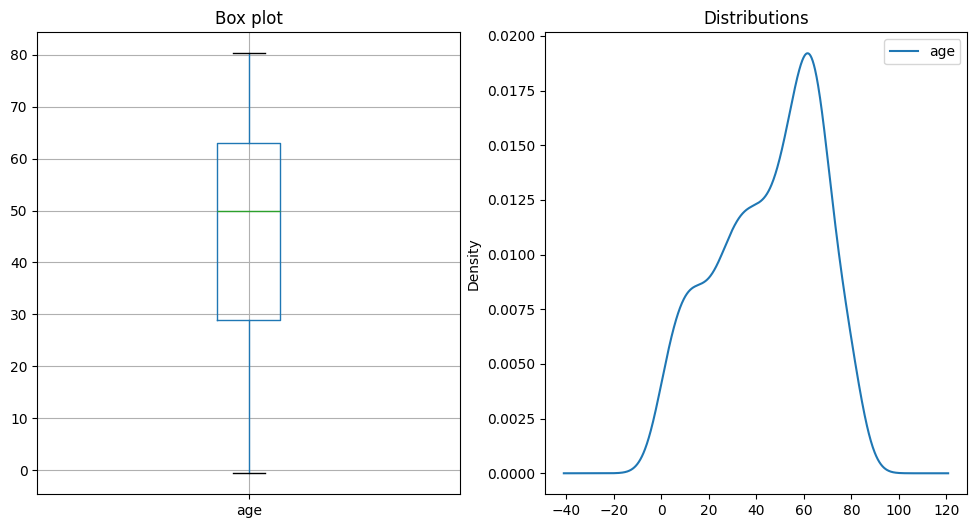

In [16]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
TrainData[['age']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['age']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_Age.pdf', format='pdf', bbox_inches='tight')
plt.show()

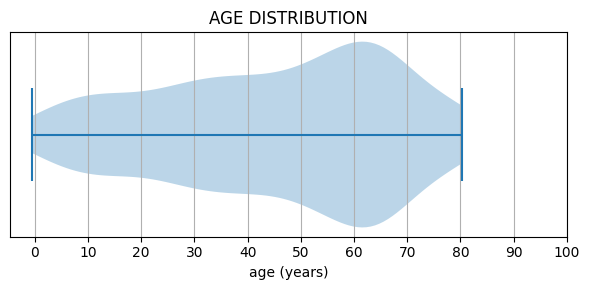

In [17]:
plt.figure(figsize=(6,3))
plt.title('AGE DISTRIBUTION')
plt.violinplot(TrainData['age'].values,vert=False)
plt.xticks(np.linspace(0,100,11))
plt.yticks([])
plt.xlabel('age (years)')
plt.grid()
plt.tight_layout()
#plt.savefig('./Plot_Analisi/PlotViolin_Dist_Age.pdf', format='pdf', bbox_inches='tight')
plt.show()

Possiamo notare come ci sia un picco di pazienti intorno ai 60 anni di età, nonostante tutte le età siano rappresentate.

In [18]:
display(TrainData[TrainData['age'] <= 1])

gender       age  hypertension  heart_disease smoking_history        bmi  \
311       1  0.080000             0              0         No Info  30.640000   
409       1  0.720000             0              0         No Info  15.440000   
439       1 -0.618799             0              0         No Info  26.739199   
518       1  0.240000             0              0         No Info  16.890000   

     HbA1c_level  blood_glucose_level  Insulin_Sensitivity_Est  \
311     6.600000           130.000000                      NaN   
409     6.500000           160.000000                 0.568217   
439     5.982008            76.886372                 0.392354   
518     5.700000           126.000000                 1.655180   

     BMI_Glucose_Interaction  Random_Lab_Marker  diabetes  
311                  3983.20          47.239481         0  
409                  2470.40          45.229166         0  
439                  2185.60          49.634084         0  
518                  2128.14          67.142346         0

### Indice di massa corporea,  livello di emoglobina glicata,  livello di glucosio nel sangue, stima della sensibilità all'insulina e interazione tra BMI e glucosio

INDICE DI MASSA CORPOREA


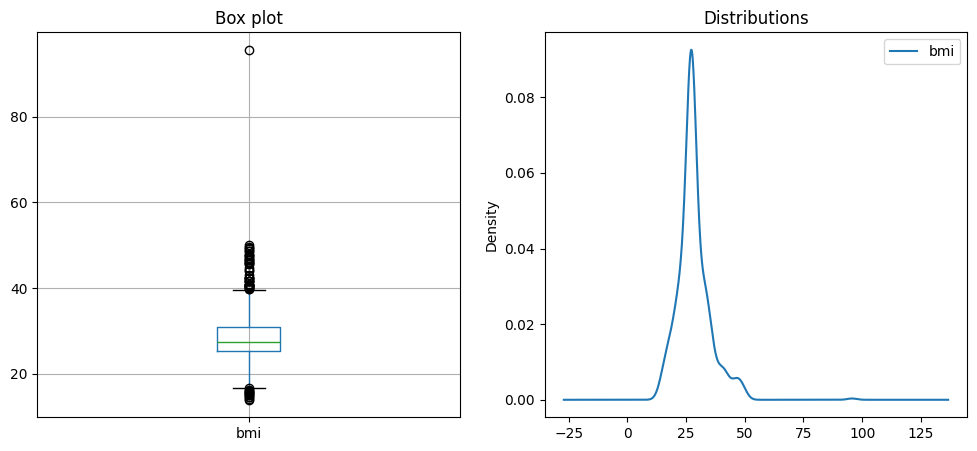

LIVELLO DI EMOGLOBINA GLICATA


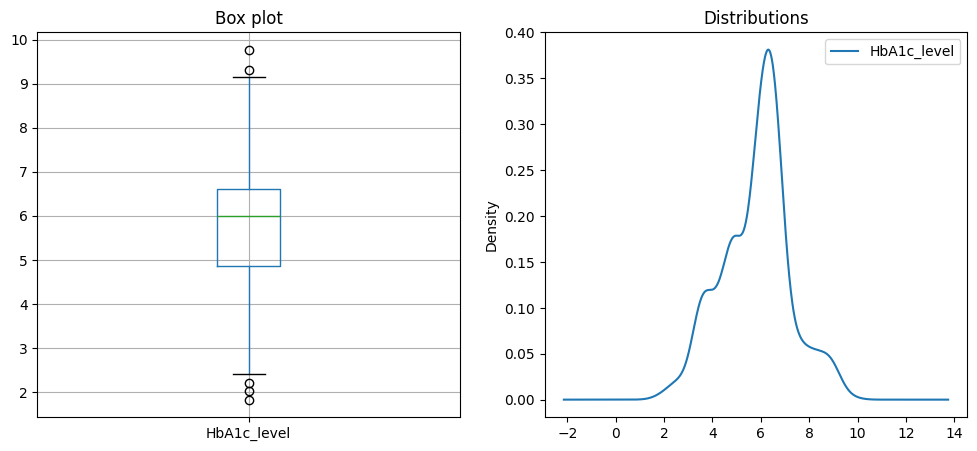

LIVELLO DI GLUCOSIO NEL SANGUE


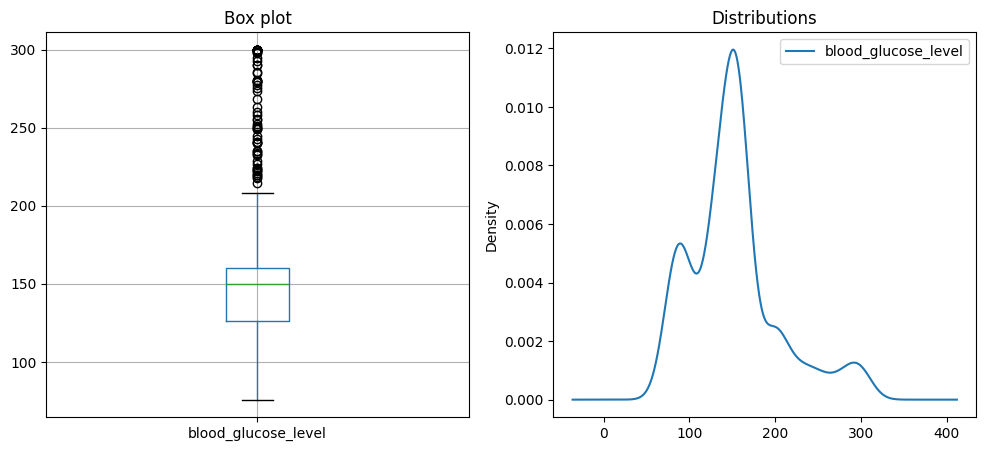

STIMA DELLA SENSIBILITA' ALL'INSULINA


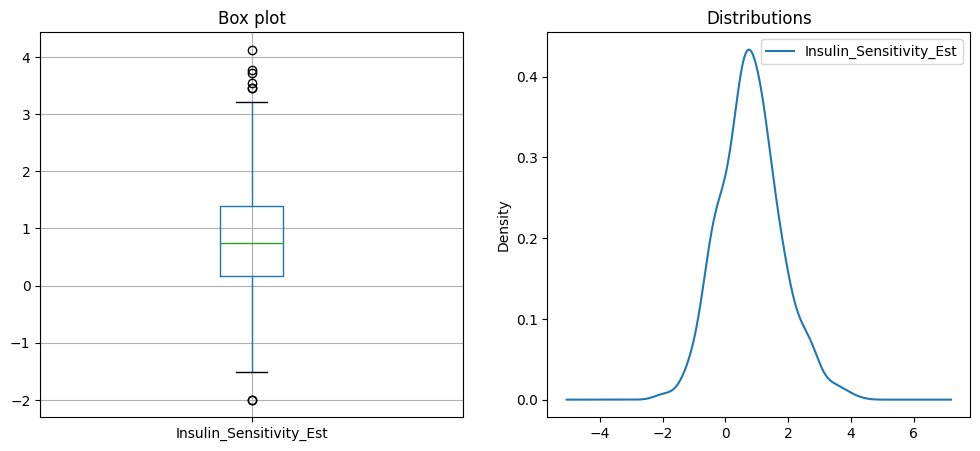

INTERAZIONE TRA BMI E GLUCOSIO


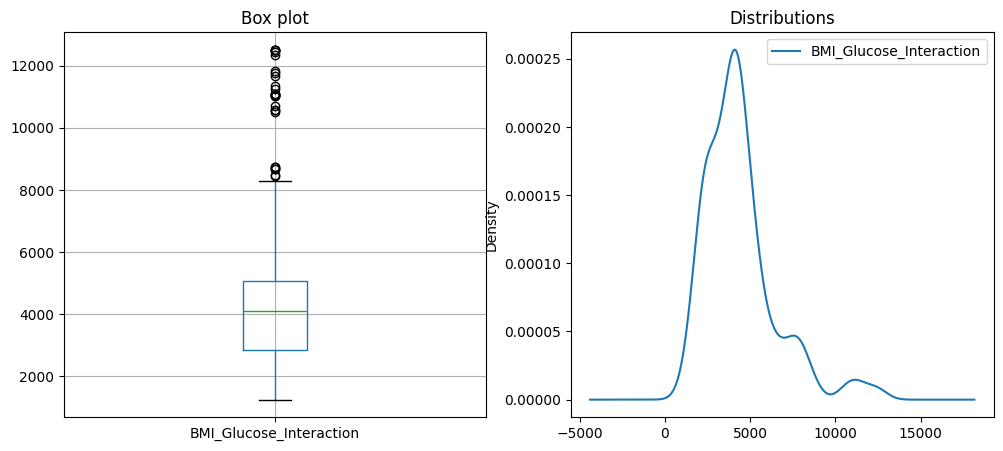

In [19]:
print('INDICE DI MASSA CORPOREA')
fig, axs = plt.subplots(1,2, figsize=(12,5))
TrainData[['bmi']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['bmi']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_Bmi.pdf', format='pdf', bbox_inches='tight')
plt.show()

print('LIVELLO DI EMOGLOBINA GLICATA')
fig, axs = plt.subplots(1,2, figsize=(12,5))
TrainData[['HbA1c_level']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['HbA1c_level']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_HbA1c.pdf', format='pdf', bbox_inches='tight')
plt.show()

print('LIVELLO DI GLUCOSIO NEL SANGUE')
fig, axs = plt.subplots(1,2, figsize=(12,5))
TrainData[['blood_glucose_level']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['blood_glucose_level']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_GlucoseLevel.pdf', format='pdf', bbox_inches='tight')
plt.show()

print("STIMA DELLA SENSIBILITA' ALL'INSULINA")
fig, axs = plt.subplots(1,2, figsize=(12,5))
TrainData[['Insulin_Sensitivity_Est']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['Insulin_Sensitivity_Est']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_InsulinSentivity.pdf', format='pdf', bbox_inches='tight')
plt.show()

print("INTERAZIONE TRA BMI E GLUCOSIO")
fig, axs = plt.subplots(1,2, figsize=(12,5))
TrainData[['BMI_Glucose_Interaction']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['BMI_Glucose_Interaction']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_BmiGlucose.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [20]:
print("L'indice di massa corporea massimo è:", np.max(TrainData['bmi']))

L'indice di massa corporea massimo è: 95.69


È possibile individuare la presenza di errori.\
Un valore di indice di massa corporea pari a 95,69 appare anomalo e con ogni probabilità è frutto di un errore nella raccolta del dato, oppure rappresenta un caso estremamente raro che può essere ragionevolmente escluso dall'analisi. A titolo di confronto, l'uomo con il più alto BMI mai registrato alla fine del Novecento pesava 362 kg, con un indice di massa corporea pari a 105,3.

SENSIBILITA' ALL'INSULINA


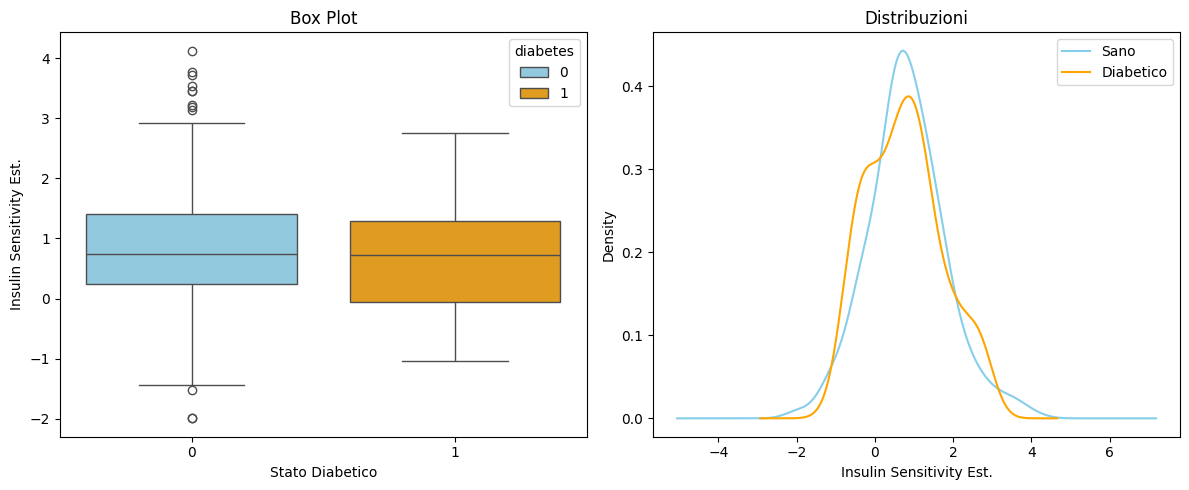

In [21]:
print("SENSIBILITA' ALL'INSULINA")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Box plot
sns.boxplot(
    data=TrainData,
    x='diabetes',
    y='Insulin_Sensitivity_Est',
    hue='diabetes',
    palette={0: 'skyblue', 1: 'orange'},
    ax=axs[0]
)
axs[0].set_title('Box Plot')
axs[0].set_xlabel('Stato Diabetico')
axs[0].set_ylabel('Insulin Sensitivity Est.')

# Density plot
TrainData[TrainData['diabetes'] == 0]['Insulin_Sensitivity_Est'].plot.density(
    ax=axs[1], label='Sano', color='skyblue'
)
TrainData[TrainData['diabetes'] == 1]['Insulin_Sensitivity_Est'].plot.density(
    ax=axs[1], label='Diabetico', color='orange'
)
axs[1].set_title('Distribuzioni')
axs[1].set_xlabel('Insulin Sensitivity Est.')
axs[1].legend()

#plt.savefig('./Plot_Analisi/Plot_Diabetes_BmiGlucose.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

### Random lab marker

RANDOM LAB MARKER


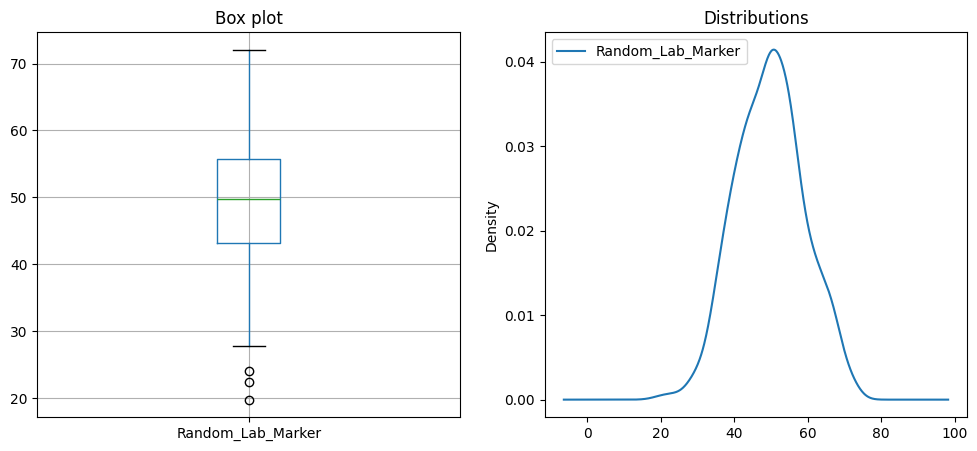

In [22]:
print('RANDOM LAB MARKER')
fig, axs = plt.subplots(1,2, figsize=(12,5))
TrainData[['Random_Lab_Marker']].boxplot(ax=axs[0])
axs[0].set_title('Box plot')
TrainData[['Random_Lab_Marker']].plot.density(ax=axs[1],legend=True)
axs[1].set_title('Distributions')
#plt.savefig('./Plot_Analisi/Plot_Dist_Marker.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Relations between variables

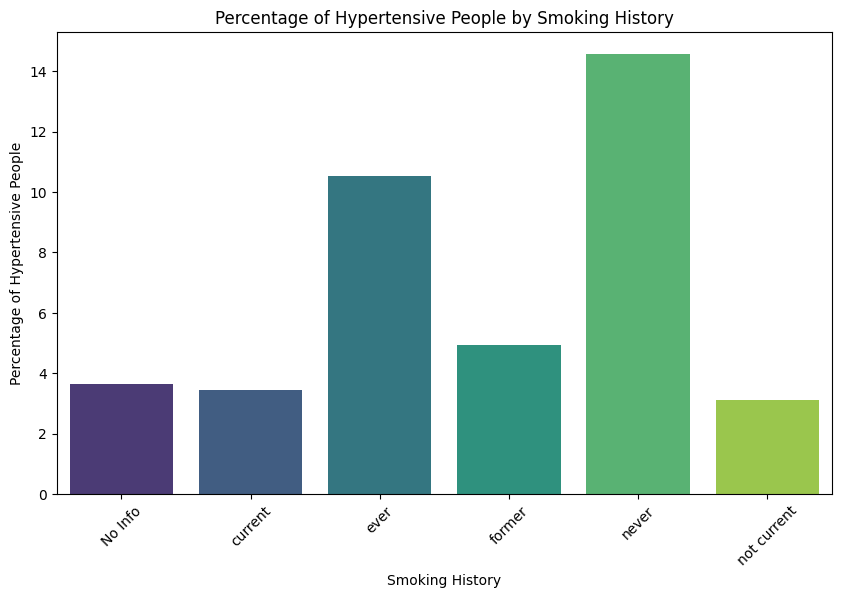

In [23]:
# Plot smoking history vs hypertension with percentage of hypertensive people
plt.figure(figsize=(10, 6))
hypertension_percentage = TrainData.groupby('smoking_history')['hypertension'].mean() * 100
sns.barplot(x=hypertension_percentage.index, y=hypertension_percentage.values, 
            hue=hypertension_percentage.index, palette="viridis")
plt.title("Percentage of Hypertensive People by Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Percentage of Hypertensive People")
plt.xticks(rotation=45)
#plt.savefig('./Plot_Analisi/Plot_HypertensionSmoking.pdf', format='pdf', bbox_inches='tight')
plt.show()

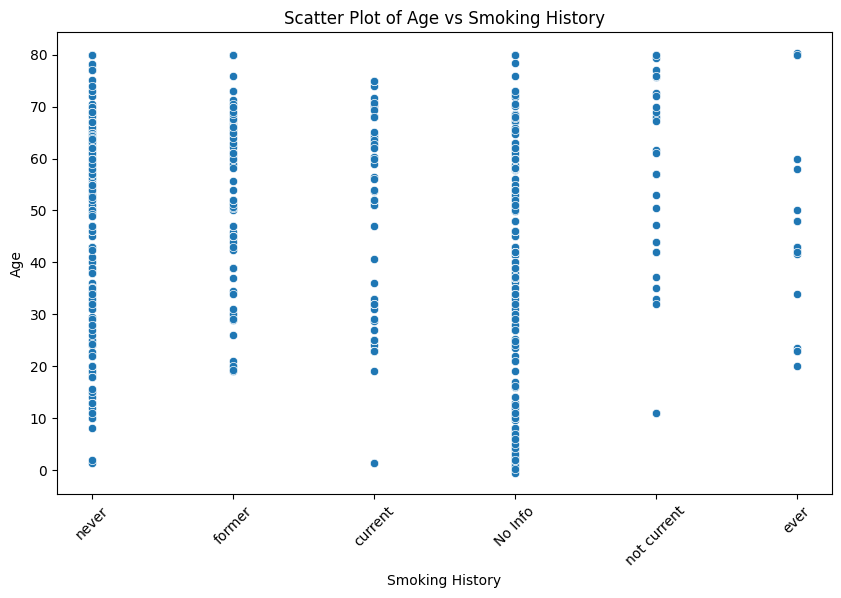

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='smoking_history', y='age')
plt.title("Scatter Plot of Age vs Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Age")
plt.xticks(rotation=45)
#plt.savefig('./Plot_Analisi/Plot_AgeSmoking.pdf', format='pdf', bbox_inches='tight')
plt.show()

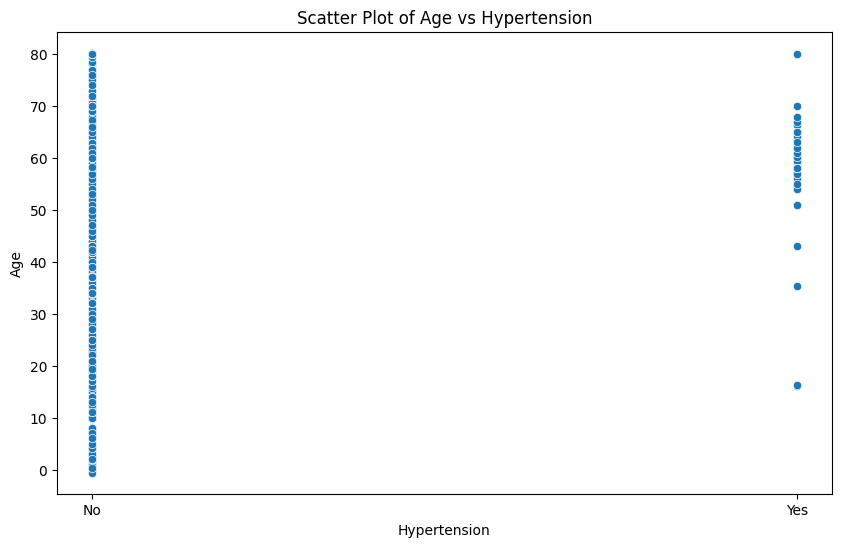

In [25]:
# Scatter plot of age on y-axis and hypertension on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='hypertension', y='age')
plt.title("Scatter Plot of Age vs Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Age")
plt.xticks([0, 1], labels=["No", "Yes"])
#plt.savefig('./Plot_Analisi/Plot_AgeHypertension.pdf', format='pdf', bbox_inches='tight')
plt.show()

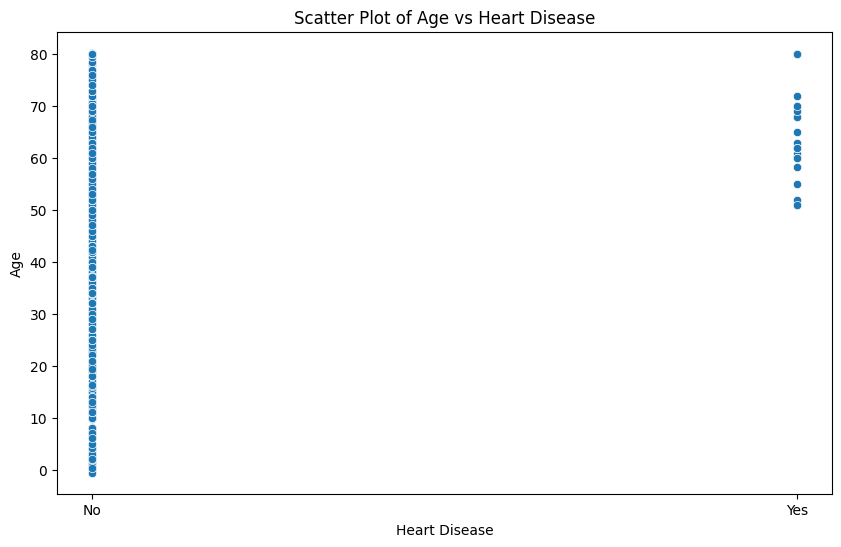

In [26]:
# Scatter plot of age on y-axis and heart_disease on x-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='heart_disease', y='age')
plt.title("Scatter Plot of Age vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.xticks([0, 1], labels=["No", "Yes"])
#plt.savefig('./Plot_Analisi/Plot_AgeHeart.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Relations with Diabete

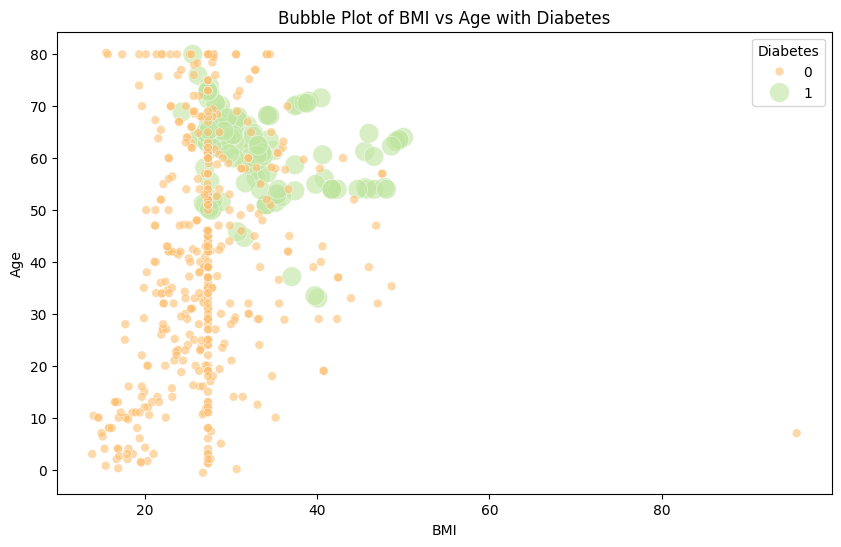

In [27]:
# Bubble plot of BMI vs Age with Diabetes as size
plt.figure(figsize=(10, 6))
# Use diabetes directly for size, but map to fixed sizes for legend clarity
size_map = {0: 40, 1: 200}
sizes = TrainData['diabetes'].map(size_map)
sns.scatterplot(
    data=TrainData,
    x='bmi',
    y='age',
    size='diabetes',
    sizes=size_map,
    hue='diabetes',
    palette="Spectral",
    alpha=0.6,
    legend='full'
)
plt.title("Bubble Plot of BMI vs Age with Diabetes")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.legend(title="Diabetes", loc='upper right')
plt.show()

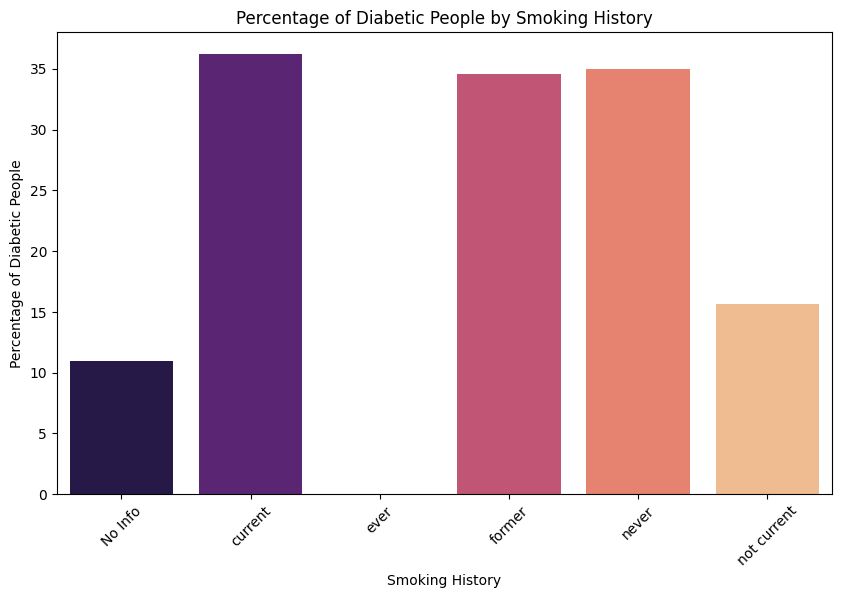

In [28]:
# Plot smoking history vs diabetes with percentage of diabetic people
plt.figure(figsize=(10, 6))
diabetes_percentage = TrainData.groupby('smoking_history')['diabetes'].mean() * 100
sns.barplot(x=diabetes_percentage.index, y=diabetes_percentage.values, hue=diabetes_percentage.index,
             palette="magma")
plt.title("Percentage of Diabetic People by Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Percentage of Diabetic People")
plt.xticks(rotation=45)
#plt.savefig('./Plot_Analisi/Plot_SmokingDiabetes.pdf', format='pdf', bbox_inches='tight')
plt.show()

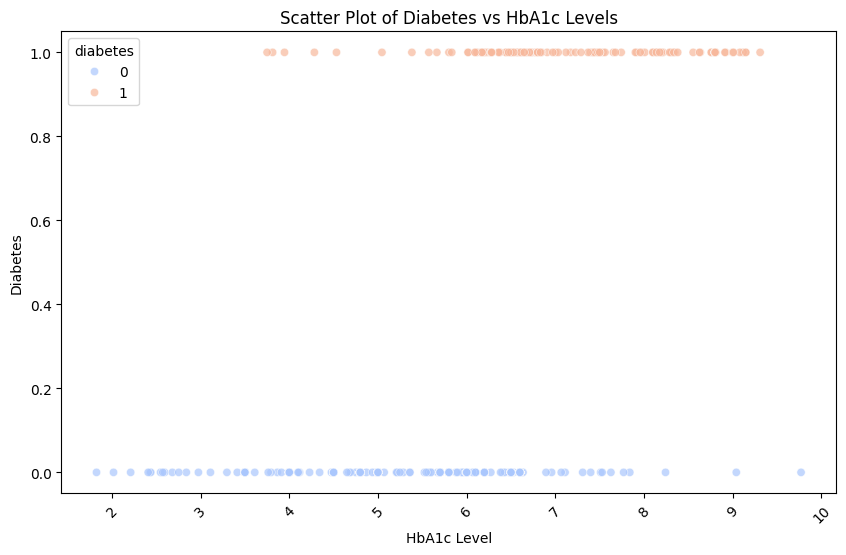

In [29]:
# Scatter plot of diabetes vs HbA1c levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='HbA1c_level', y='diabetes', hue='diabetes', palette="coolwarm", 
                alpha=0.7)
plt.title("Scatter Plot of Diabetes vs HbA1c Levels")
plt.xlabel("HbA1c Level")
plt.ylabel("Diabetes")
plt.xticks(rotation=45)
#plt.savefig('./Plot_Analisi/Plot_HbA1cDiabetes.pdf', format='pdf', bbox_inches='tight')
plt.show()

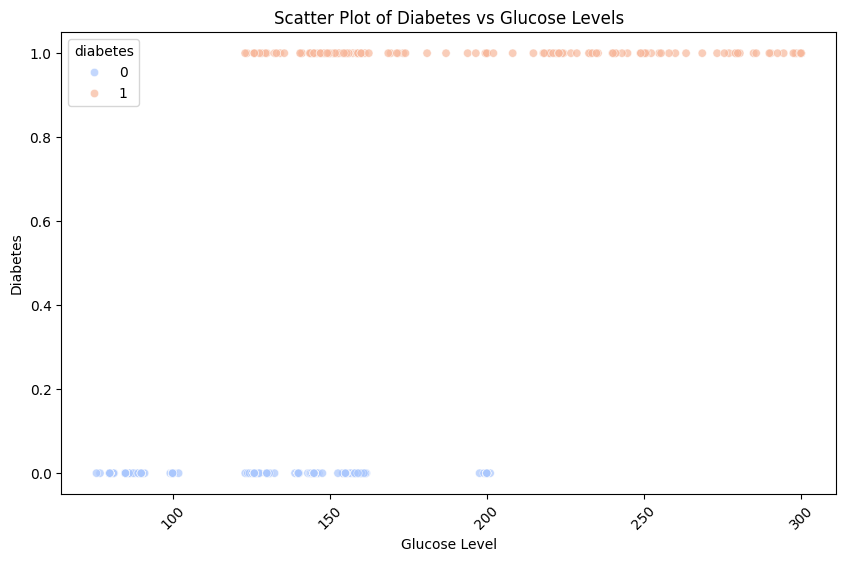

In [30]:
# Scatter plot of diabetes vs glucose levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='blood_glucose_level', y='diabetes', hue='diabetes', 
                palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot of Diabetes vs Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Diabetes")
plt.xticks(rotation=45)
#plt.savefig('./Plot_Analisi/Plot_GlucoseDiabetes.pdf', format='pdf', bbox_inches='tight')
plt.show()

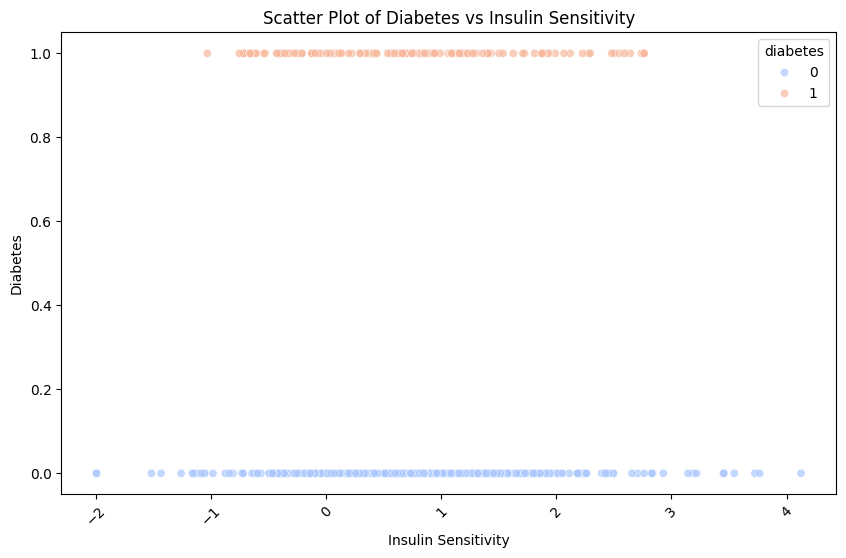

In [31]:
# Scatter plot of diabetes vs insulin sensitivity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='Insulin_Sensitivity_Est', y='diabetes', hue='diabetes', 
                palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot of Diabetes vs Insulin Sensitivity")
plt.xlabel("Insulin Sensitivity")
plt.ylabel("Diabetes")
plt.xticks(rotation=45)
#plt.savefig('./Plot_Analisi/Plot_InsulinDiabetes.pdf', format='pdf', bbox_inches='tight')
plt.show()

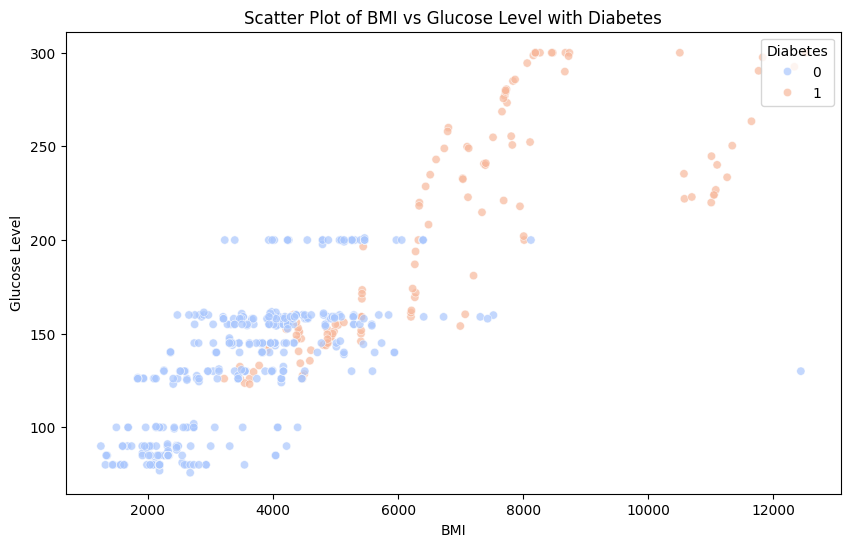

In [32]:
# Plot diabetes vs BMI and Glucose interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=TrainData, x='BMI_Glucose_Interaction', y='blood_glucose_level', 
                hue='diabetes', palette="coolwarm", alpha=0.7)
plt.title("Scatter Plot of BMI vs Glucose Level with Diabetes")
plt.xlabel("BMI")
plt.ylabel("Glucose Level")
plt.legend(title="Diabetes", loc='upper right')
#plt.savefig('./Plot_Analisi/Plot_BmiDiabetes.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Correlazione

#### Elaborazione provvisoria dei dati 

Codifica Smoking info, sostituzione dati mancanti con media e rimozione errori su BMI ed age.

In [33]:
#Encoding smoking data
data_ohe = pd.get_dummies(TrainData)
data_noNull = data_ohe.fillna(data_ohe.mean(numeric_only=True))
data_noNull_noOut = data_noNull[(data_noNull['age'] > 0) & (data_noNull['bmi'] < 70)] 
display(data_noNull_noOut)

gender        age  hypertension  heart_disease        bmi  HbA1c_level  \
0         1  64.822537             0              0  27.097915     6.517746   
1         1  59.912290             1              0  33.206670     7.971341   
2         1  67.853267             0              0  30.639790     8.919297   
3         1  57.985607             0              0  32.609541     8.759698   
4         1  70.278133             0              0  37.703827     6.261874   
..      ...        ...           ...            ...        ...          ...   
583       0  19.354174             0              0  28.670601     5.248329   
584       0  70.000000             0              0  24.750000     3.500000   
585       1  60.000000             0              1  29.050000     5.800000   
586       0  27.000000             0              0  27.320000     6.000000   
587       1  80.000000             0              0  17.350000     3.500000   

     blood_glucose_level  Insulin_Sensitivity_Est  BMI_Glucose_Interaction  \
0             157.338059                 1.220942              4262.942153   
1             148.625701                 0.807652              4932.729931   
2             240.733664                 1.225950              7372.749574   
3             154.640163                 1.432736              5039.552869   
4             169.415511                 0.684205              6267.482417   
..                   ...                      ...                      ...   
583           160.905601                 0.959618              4808.000000   
584           159.000000                -1.084071              3935.250000   
585           145.000000                -0.468180              4212.250000   
586           200.000000                 0.802415              5464.000000   
587           130.000000                -0.596994              2255.500000   

     Random_Lab_Marker  diabetes  smoking_history_No Info  \
0            38.820127         1                    False   
1            40.381336         1                    False   
2            55.789060         1                    False   
3            40.877685         1                    False   
4            53.671280         1                    False   
..                 ...       ...                      ...   
583          52.632201         0                    False   
584          43.652306         0                    False   
585          58.503956         0                    False   
586          60.704415         0                     True   
587          35.951112         0                    False   

     smoking_history_current  smoking_history_ever  smoking_history_former  \
0                      False                 False                   False   
1                      False                 False                   False   
2                      False                 False                    True   
3                      False                 False                   False   
4                       True                 False                   False   
..                       ...                   ...                     ...   
583                    False                 False                    True   
584                    False                 False                   False   
585                     True                 False                   False   
586                    False                 False                   False   
587                    False                  True                   False   

     smoking_history_never  smoking_history_not current  
0                     True                        False  
1                     True                        False  
2                    False                        False  
3                     True                        False  
4                    False                        False  
..                     ...                          ...  
583                  False                 

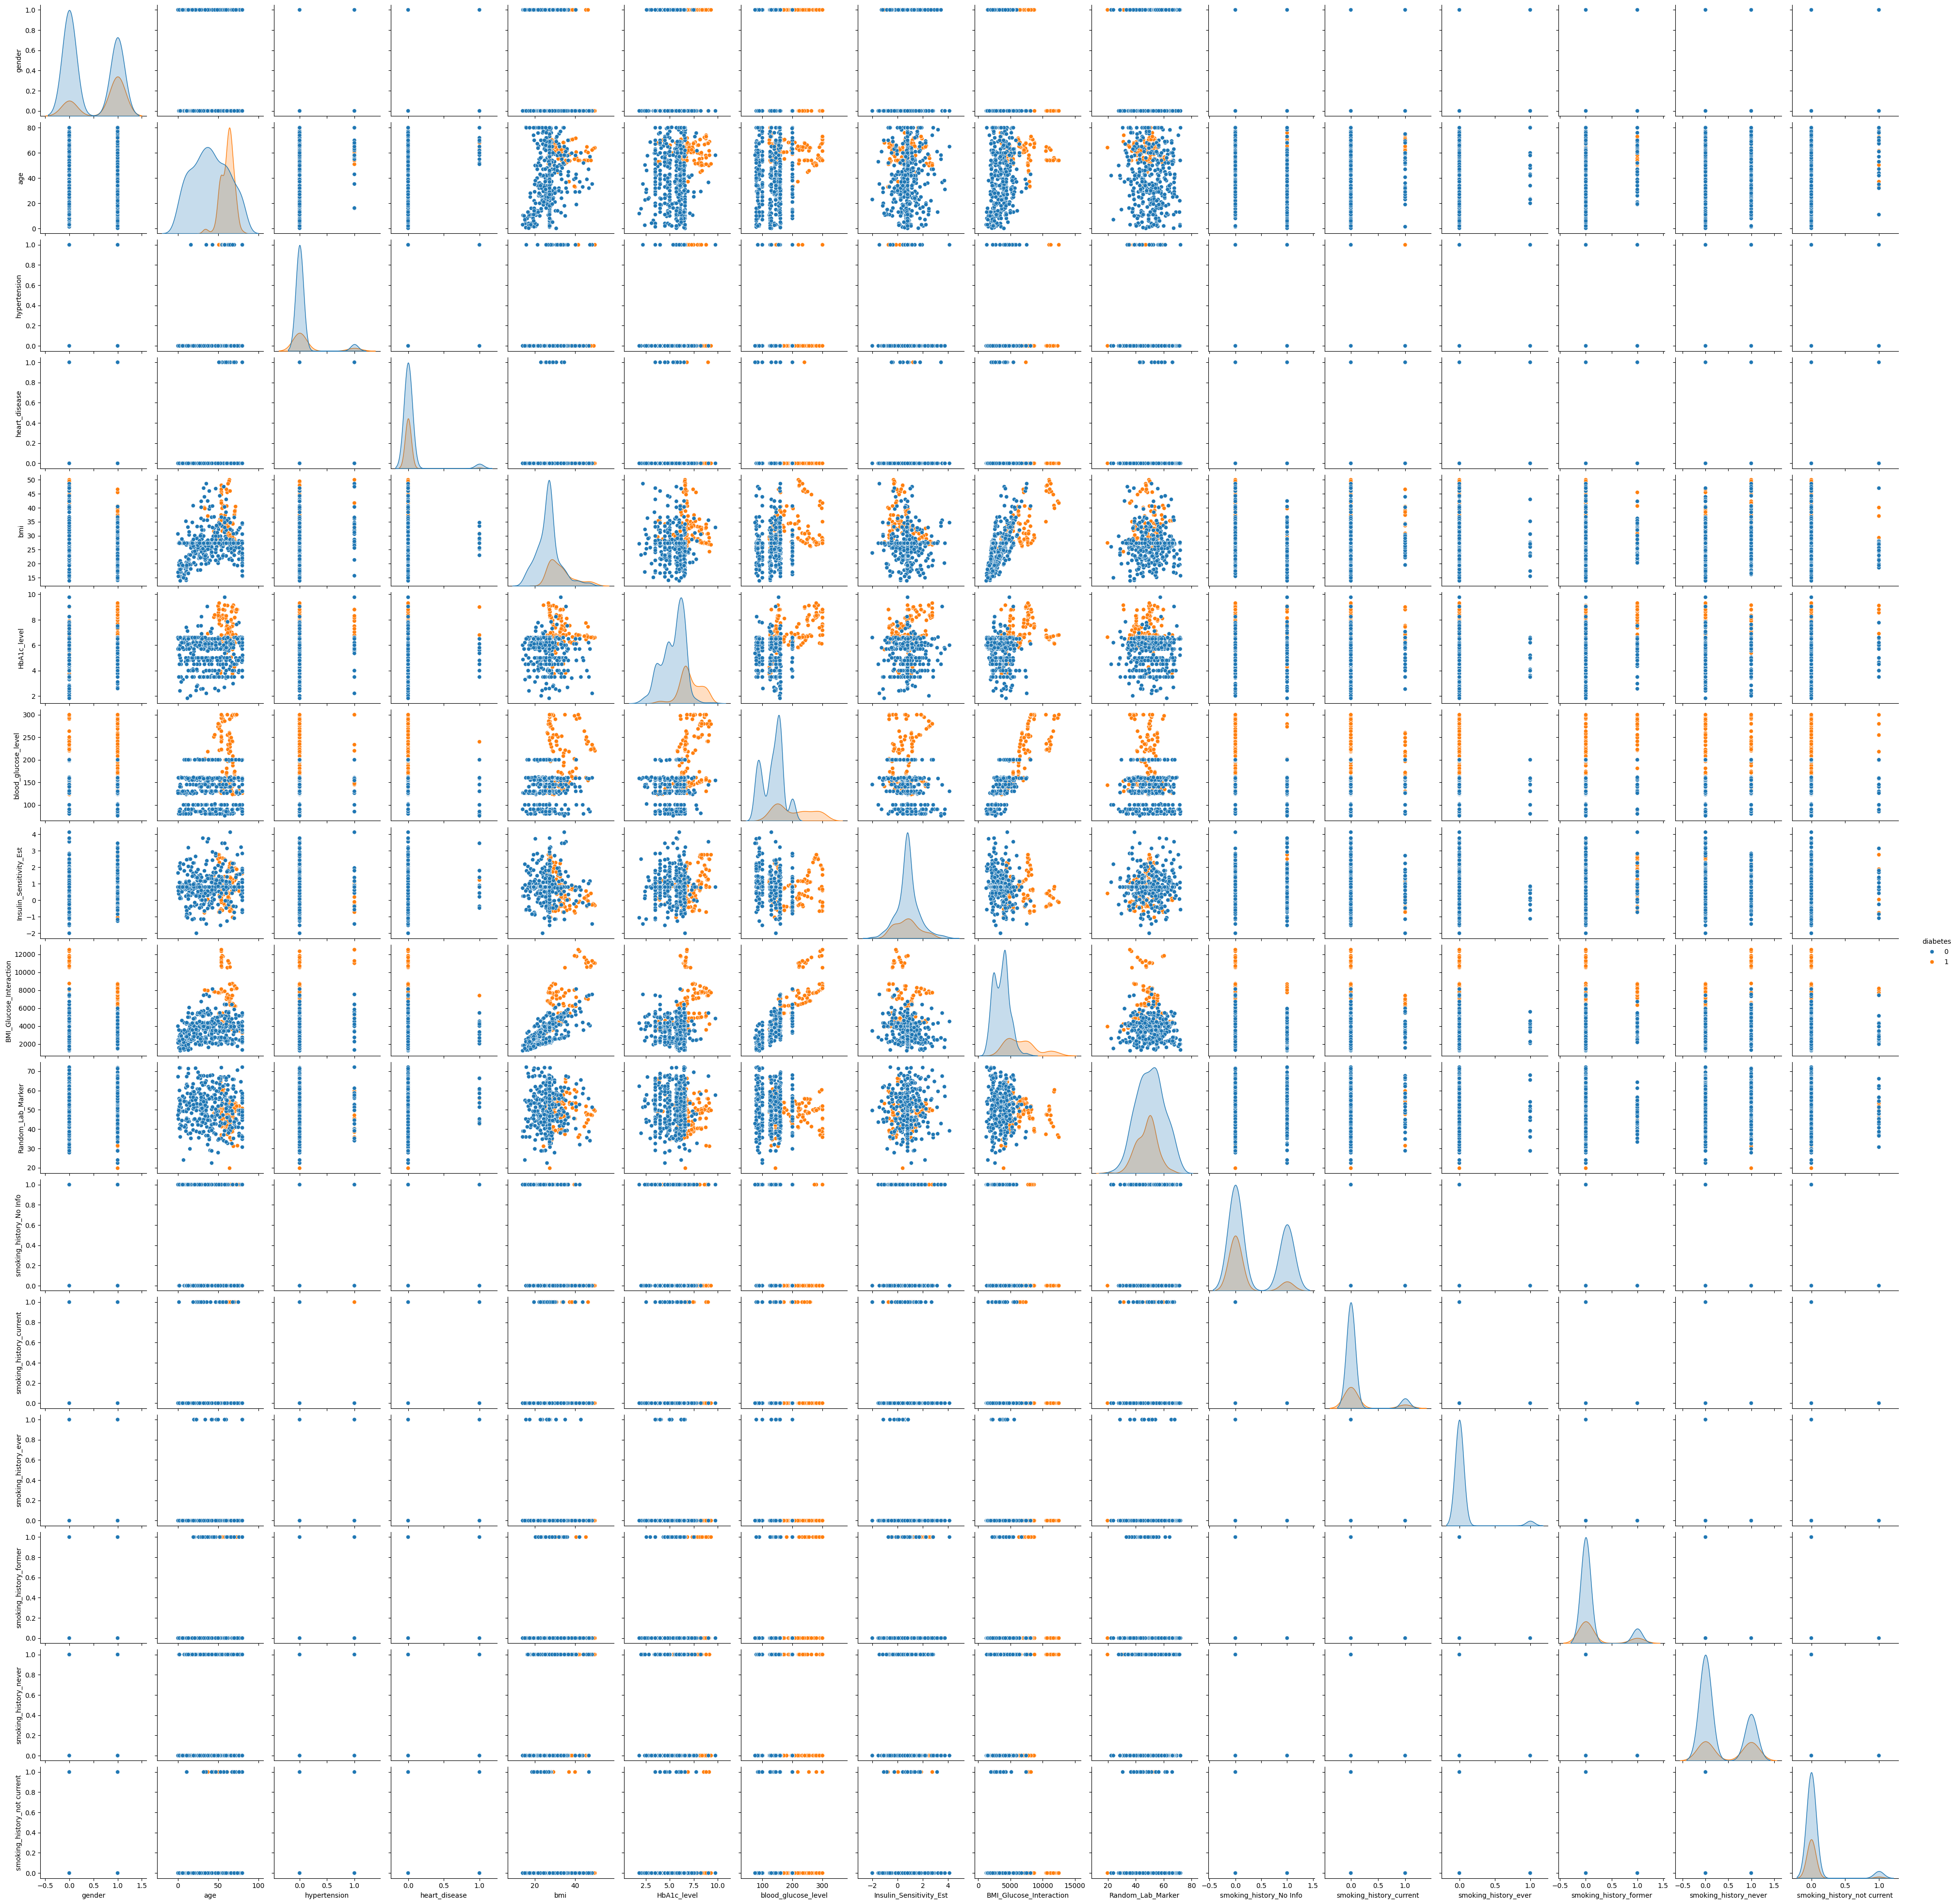

In [34]:
# Pair plot
sns.pairplot(data_noNull_noOut, hue='diabetes')
#plt.savefig('./Plot_Analisi/PairPlot.pdf', format='pdf', bbox_inches='tight')
plt.show()

<Axes: >

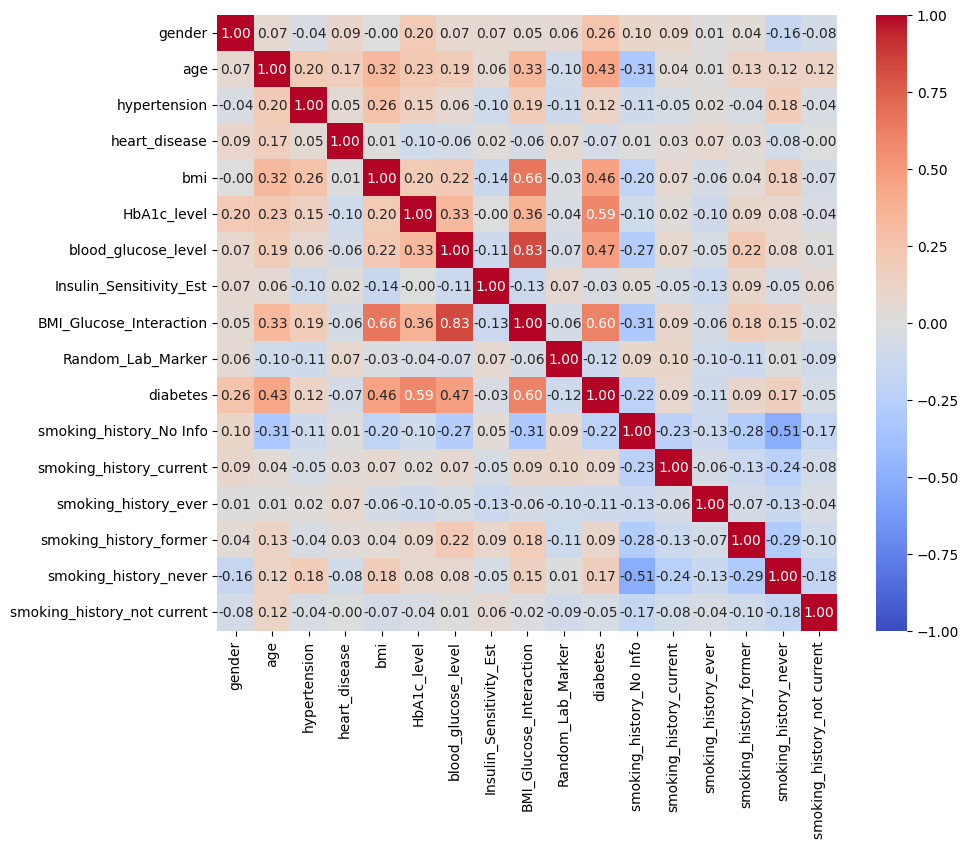

In [35]:
#Spearman correlation between features
res = sp.stats.spearmanr(data_noNull_noOut)
corr_matrix = pd.DataFrame(res.statistic, index=data_noNull_noOut.columns, columns=data_noNull_noOut.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
#plt.savefig('./Plot_Analisi/Heatmap.pdf', format='pdf', bbox_inches='tight')

Come previsto, l'interazione tra BMI e livello di glucosio mostra una forte correlazione sia con il glucosio stesso che con l'indice di massa corporea. Inoltre, la presenza del diabete risulta ben correlata con il livello di emoglobina glicata.

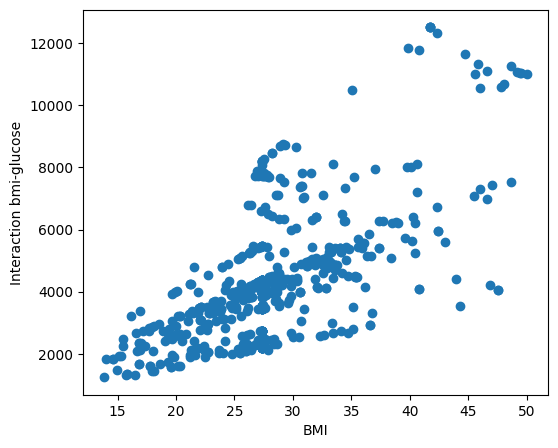

In [36]:
fig = plt.figure(figsize=(6,5))
plt.scatter(data_noNull_noOut['bmi'], data_noNull_noOut['BMI_Glucose_Interaction'])
plt.xlabel('BMI')
plt.ylabel('Interaction bmi-glucose')
#plt.savefig('./Plot_Analisi/Plot_Corr_BmiInteraction.pdf', format='pdf', bbox_inches='tight')
plt.show()

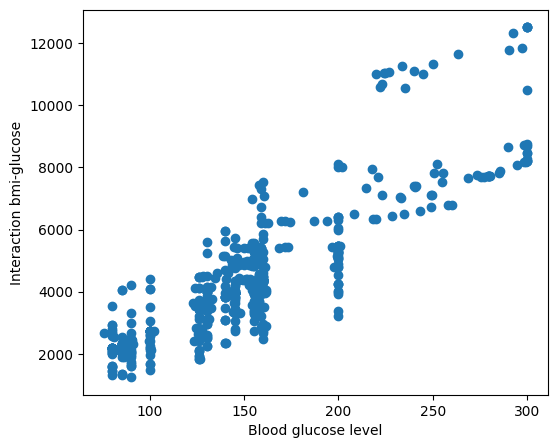

In [37]:
fig = plt.figure(figsize=(6,5))
plt.scatter(data_noNull_noOut['blood_glucose_level'], data_noNull_noOut['BMI_Glucose_Interaction'])
plt.xlabel('Blood glucose level')
plt.ylabel('Interaction bmi-glucose')
#plt.savefig('./Plot_Analisi/Plot_Corr_GlucoseInteraction.pdf', format='pdf', bbox_inches='tight')
plt.show()